# Finance Data Project 

In this data project the focus is on exploratory data analysis of stock prices. This project is just meant for visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

Focussing on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
from datetime import datetime
%matplotlib inline

In [46]:
'''start = datetime(2007, 1, 1)
end = datetime(2016, 1, 1)
gs = get_historical_data("GS", start, end,output_format='pandas',token=api_key)'''

'start = datetime(2007, 1, 1)\nend = datetime(2016, 1, 1)\ngs = get_historical_data("GS", start, end,output_format=\'pandas\',token=api_key)'

In [3]:
df = pd.read_pickle('all_banks')
#df.head()

This is what the column values mean actually:

Open- Opening value of the stock that day

High - highest value of the stock that day

Low - lowest value of the stock that day

Close - Closing price on that day

Volume - volume of how many stocks were traded that day

** Created a list of the ticker symbols (as strings) in alphabetical order. **

In [4]:
tickers = ['BAC','C', 'GS','JPM','MS','WFC']

In [5]:
bank_stocks = df

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

** The max Close price for each bank's stock throughout the time period:**

In [8]:
bank_stocks = df.transpose()
#bank_stocks.head()

In [9]:
bank_stocks.xs('Close',level=1).max(axis=1)

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [10]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

Here we wish to access the 'Close' data of each bank, since it's a column hence we set the axis to be 1, and it comes at the 'Stock Info' column level. Now we can compute the max of the 'Close' data of each bank.

** Returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

In [12]:
bank_stocks.head()

Date                     2006-01-03   2006-01-04   2006-01-05   2006-01-06  \
Bank Ticker Stock Info                                                       
BAC         Open              46.92        47.00        46.58        46.80   
            High              47.18        47.24        46.83        46.91   
            Low               46.15        46.45        46.32        46.35   
            Close             47.08        46.58        46.64        46.57   
            Volume      16296700.00  17757900.00  14970900.00  12599800.00   

Date                     2006-01-09   2006-01-10   2006-01-11   2006-01-12  \
Bank Ticker Stock Info                                                       
BAC         Open              46.72        46.40        46.06        46.22   
            High              46.97        46.51        46.25        46.23   
            Low               46.36        45.88        45.75        45.71   
            Close             46.60        46.21        46.10        45.80   
            Volume      15620000.00  15634800.00  14745100.00  10546600.00   

Date                     2006-01-13   2006-01-17  ...   2015-12-17  \
Bank Ticker Stock Info                            ...                
BAC         Open              45.83        45.40  ...        17.80   
            High              46.00        45.58  ...        17.83   
            Low               45.68        45.00  ...        17.30   
            Close             45.80        45.31  ...        17.30   
            Volume      10791300.00  14606100.00  ...  97265726.00   

Date                      2015-12-18   2015-12-21   2015-12-22   2015-12-23  \
Bank Ticker Stock Info                                                        
BAC         Open        1.719000e+01        16.98        17.05        17.16   
            High        1.726000e+01        17.03        17.11        17.34   
            Low         1.676000e+01        16.77        16.85        17.10   
            Close       1.676000e+01        16.97        17.08        17.34   
            Volume      1.367378e+08  65150270.00  56173502.00  65770672.00   

Date                     2015-12-24   2015-12-28   2015-12-29   2015-12-30  \
Bank Ticker Stock Info                                                       
BAC         Open              17.32        17.22        17.25        17.20   
            High              17.38        17.23        17.35        17.24   
            Low               17.22        16.98        17.16        17.04   
            Close             17.27        17.13        17.28        17.05   
            Volume      29373415.00  41777497.00  45670376.00  35066378.00   

Date                     2015-12-31  
Bank Ticker Stock Info               
BAC         Open              17.01  
            High              17.07  
            Low               16.83  
            Close             16.83  
            Volume      47152968.00  

[5 rows x 2517 columns]

** Created a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [13]:
for i in tickers:
    returns[i+' Return'] = bank_stocks.xs((i,'Close'))

In [14]:
returns = returns.pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Created a pairplot to understand and observe stock data**

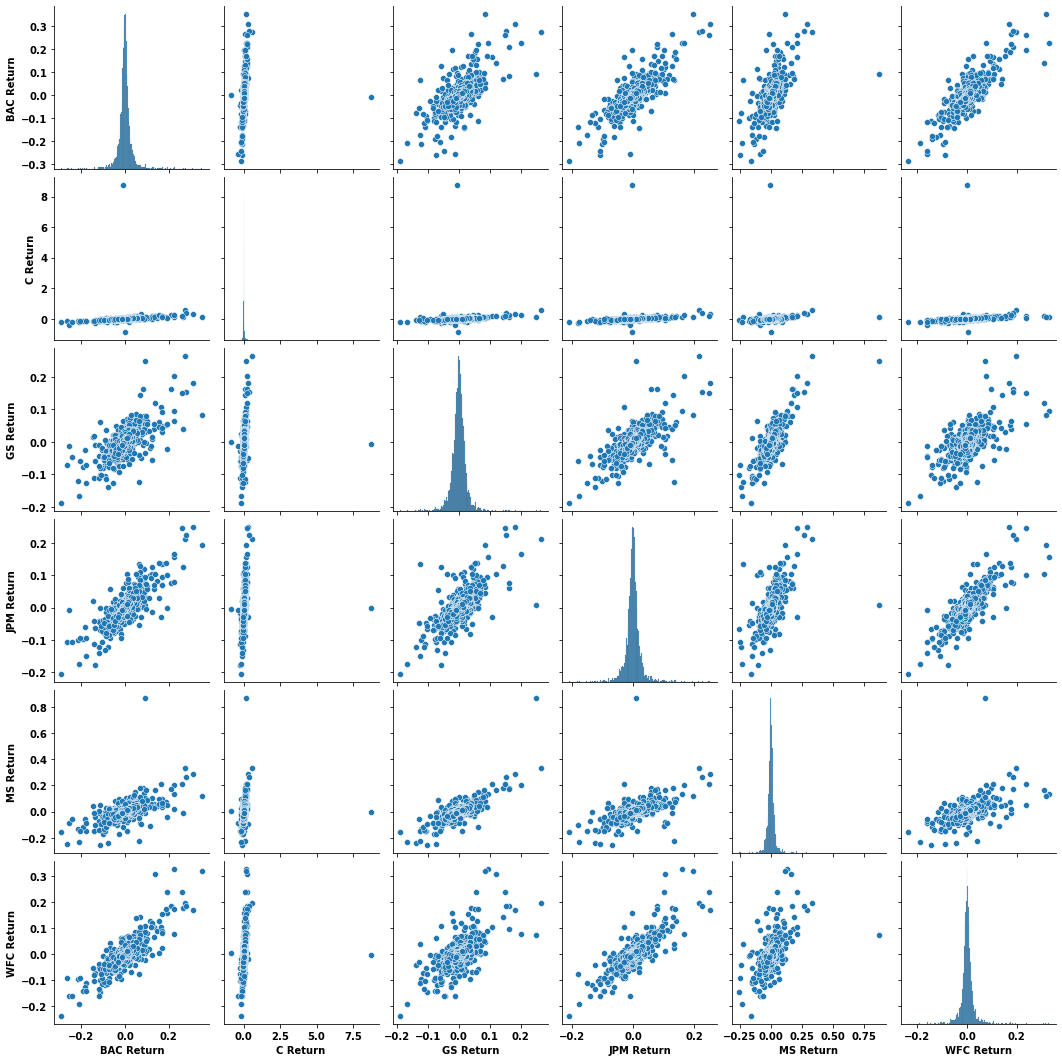

In [15]:
sns.pairplot(data=returns)
# C Returns stands out since the points are almost linearly aligned

In [16]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [17]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

On January 20, 2009, the U.S. stock market was in free fall, the financial crisis was in full swing.

** Citigroup's largest drop and biggest gain were very close to one another **

Citigroup on May 6, 2011 announced a 1-for-10 reverse stock split of the company's common shares

In [18]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Riskiness of a stock can be measured by standard deviation of returns of the stock. If we are having large std deviations of the returns it means the stock is going up and down a lot. Low std means the price is pretty steady.

Riskiest stock over entire time period: Citi(C)

In [19]:
returns.reset_index(inplace=True)

In [20]:
returns['Year'] = pd.DatetimeIndex(returns['Date']).year

In [21]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
Year          2.872437
dtype: float64

In [22]:
returns[returns['Year'] == 2015].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
Year          0.000000
dtype: float64

Here BAC has the highest std hence the riskiest for 2015, but it's not very different from other banks, just slightly higher.

** Created a distplot using seaborn of the 2015 returns for Morgan Stanley **

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

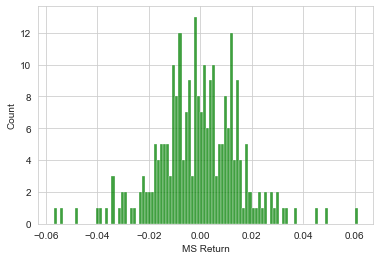

In [23]:
sns.set_style('whitegrid')
sns.histplot(returns[returns['Year'] == 2015]['MS Return'], bins=100,color='green')

Here we see the standard deviation is 0.06 so quite stable. However in case of citigroup the SD is 0.6(10 times more deviation) which is quite an outlier, due to the financial crisis Citi group went through.

** Created a distplot using seaborn of the 2008 returns for CitiGroup **

<AxesSubplot:xlabel='C Return', ylabel='Count'>

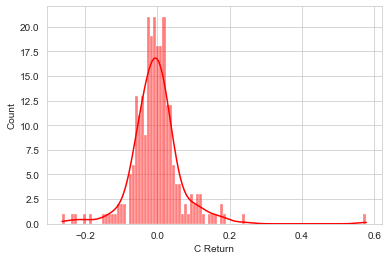

In [24]:
sns.set_style('whitegrid')
sns.histplot(returns[returns['Year'] == 2008]['C Return'], bins=100,color='red',kde=True)

____
# Let's do some More Visualization


### Imports

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

** Created a line plot showing Close price for each bank for the entire index of time.**

In [26]:
g = bank_stocks.xs('Close',level=1).transpose()

<AxesSubplot:xlabel='Date'>

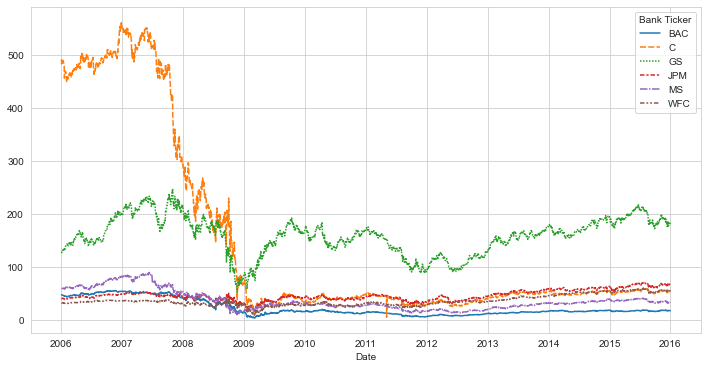

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(data = g)

In [28]:
#df.head()

In [29]:
df.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [30]:
df['BAC'].head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


In [31]:
df['BAC'].loc['2008-01-01':'2009-01-01'].head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,41.53,41.55,40.35,40.56,30767876
2008-01-03,40.63,40.81,40.25,40.30,22589488
2008-01-04,40.00,40.29,39.76,39.85,34924119
2008-01-07,40.05,40.24,39.26,39.90,31885085
2008-01-08,40.18,40.21,38.28,38.41,42147262


In [32]:
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30)

Rolling [window=30,center=False,axis=0]

<AxesSubplot:xlabel='Date'>

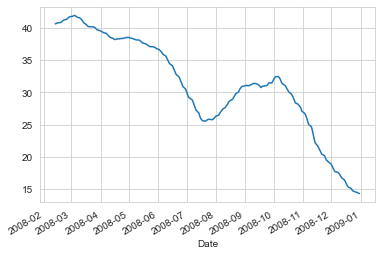

In [33]:
#Then we just call mean off of it
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')

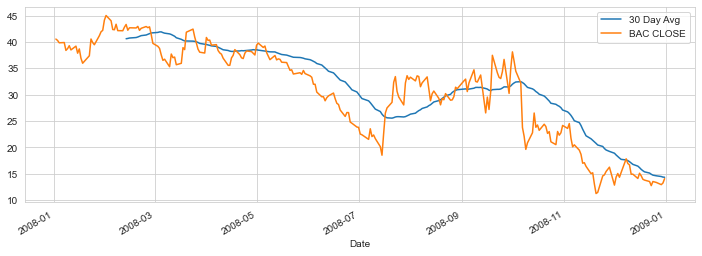

In [34]:
plt.figure(figsize=(12,4))
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Created a heatmap of the correlation between the stocks Close Price.**

In [35]:
a=bank_stocks.xs('Close',level=1).transpose().corr()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

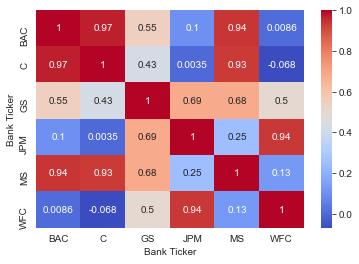

In [36]:
sns.heatmap(data=a, cmap="coolwarm",annot=True)

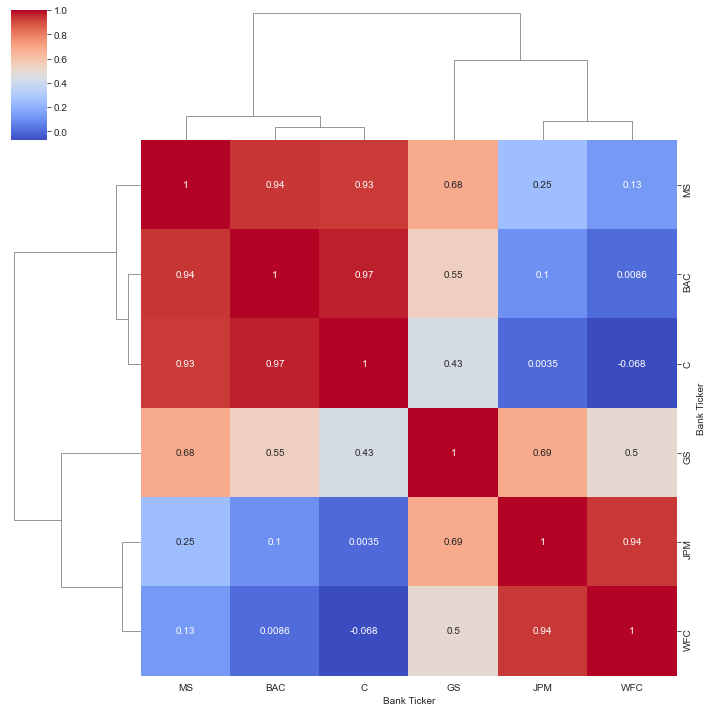

In [37]:
sns.clustermap(a,annot=True,cmap='coolwarm')

Here we see C,BAC,MS in one group and GS,JPM,WFC in one group.

** Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [38]:
dfbac = df['BAC']
dfbac = dfbac['2015-01-01':'2016-01-01']

In [39]:
dfbac.iplot(kind='candle')

Candle Stick plot is for financial analysis, basically tells whether the stock went up or down based off the color. 

Green means increasing
Red means decreasing

It also tells the opening high and closing price.

** Created a Bollinger Band Plot for Bank of America for the year 2015.**

In [43]:
dfbac['2015-01-01':'2016-01-01'].ta_plot(study='boll') 

## Conclusion

The visualizations obtained for Exploratory Data Analysis of the Bank Data gives us some very important insights as an Analyst. The trends as well as the fluctuations help us study the market in a much more efficient manner. Banks can leverage such data visualizations to gain knowledge as to how to be better prepared for sudden market changes and how to cope up with minimal losses. Stocks data for Citi group, for example, were an outlier as compared to rest of banks which is coherent with their startegy and situation during the Financial Crisis. 
With visualization tools providing so much insights from simple stocks data it is truly amazing how we can leverage this along with the domain experts to form strategies that can help organisations learn and build upon from previous experiences.